# 2021/11/26
# 本代码绘制地面2m温度、感热、潜热 4月的

In [93]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

In [94]:
lon_slice  =  slice(60,120)
lat_slice  =  slice(-10,30)
time_slice =  slice(1,30)

f = xr.open_dataset("/home/sun/qomo-data/composite-merra2-single.nc").sel(lon=lon_slice,lat=lat_slice,time=time_slice)

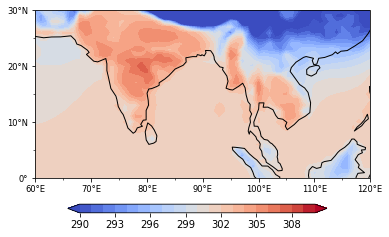

In [95]:
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  60,120,0,30
extent     =  [lonmin,lonmax,latmin,latmax]

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),levels=np.linspace(290,310,21).astype(int),cmap='coolwarm',alpha=1,extend='both')
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')



fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

plt.savefig("/home/sun/paint/t2m_april.pdf",dpi=300)

In [4]:
f2 = xr.open_dataset("/home/sun/qomo-data/composite_shlh.nc").sel(lon=lon_slice,lat=slice(30,-10),time=time_slice) #其实是用era5的数据，这里纬度是反着来的

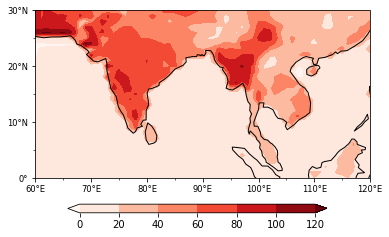

In [5]:
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  60,120,0,30
extent     =  [lonmin,lonmax,latmin,latmax]

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f2.lon,f2.lat,-1*np.average(f2.SSHF.data,axis=0)/86400,cmap='Reds',alpha=1,extend='both')
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')



fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

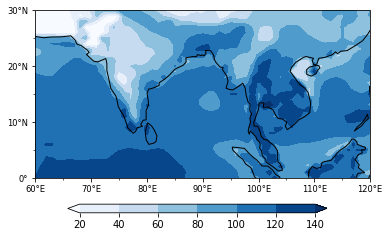

In [6]:
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  60,120,0,30
extent     =  [lonmin,lonmax,latmin,latmax]

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f2.lon,f2.lat,-1*np.average(f2.SLHF.data,axis=0)/86400,cmap='Blues',alpha=1,extend='both')
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')



fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

# 绘制感热通量的10-15N平均的纬向剖面图

In [14]:
sh_average1  =  -1*np.average(f2.SSHF.data,axis=0)/86400
sh_average2  =  np.average(sh_average1[15:20],axis=0)


(60.0, 120.0)

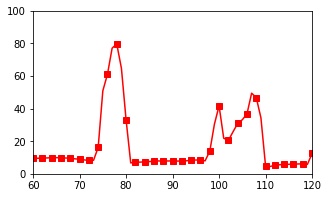

In [63]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

ax.plot(f2.lon.data,sh_average2,color='red',linewidth=1.5,marker='s',markevery=2)

ax.set_ylim((0,100))
ax.set_xlim((60,120))
#ax.set_xticklabels(np.linspace(60,120,7).astype(int).astype(str))


In [41]:
f3  =  xr.open_dataset("/home/sun/qomo-data/gebco/bathymetric.nc").sel(lat=slice(10,15))
elevation  =  np.average(f3.elevation,axis=0)

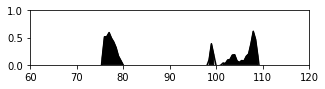

In [83]:
elevation

fig = plt.figure(figsize=(5,1))
ax = fig.add_subplot(111)

ax.plot(f3.lon.data,elevation/1000,color='black',linewidth=1.5)

ax.set_ylim((0,1))
ax.set_xlim((60,120))

ax.fill_between(f3.lon.data,0,elevation/1000,where=elevation>0,color='k')

plt.savefig("/home/sun/paint/lunwen/dixing.pdf",dpi=1200)

# 绘制垂直流线图

In [87]:
f4  =  xr.open_dataset("/home/sun/qomo-data/composite3.nc").sel(lat=slice(10,15),lon=slice(60,110))

In [88]:
uwind  =  np.average(np.average(f4.uwind[0:30],axis=0),axis=1)
vwind  =  np.average(np.average(f4.vwind[0:30],axis=0),axis=1)
omega  =  np.average(np.average(f4.OMEGA[0:30],axis=0),axis=1)*-60

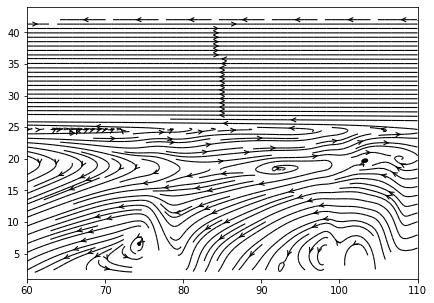

In [92]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.streamplot(f4.lon.data, np.linspace(1,42,42), 
              uwind, omega, 
              color='k',linewidth=1.1,arrowstyle='->',
              density=2)

plt.savefig("/home/sun/paint/lunwen/w-v_10_15N.pdf",dpi=1200)

In [79]:
f4.level.data[10]

750.0

In [74]:
uwind.shape

(42, 97)